In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [14]:
sns.set_style("ticks")

## Preparing the dataframes

In [15]:
df_all = pd.read_csv('dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

1584823

In [16]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [17]:
display(df_all.head(), df_all.tail())

,localminute,dataid,meter_value
localminute,,,
2015-10-01 00:00:10-05:00,2015-10-01 00:00:10-05,739,88858
2015-10-01 00:00:13-05:00,2015-10-01 00:00:13-05,8890,197164
2015-10-01 00:00:20-05:00,2015-10-01 00:00:20-05,6910,179118
2015-10-01 00:00:22-05:00,2015-10-01 00:00:22-05,3635,151318
2015-10-01 00:00:22-05:00,2015-10-01 00:00:22-05,1507,390354


,localminute,dataid,meter_value
localminute,,,
2016-03-31 23:59:14.336743-05:00,2016-03-31 23:59:14.336743-05,2129,201726
2016-03-31 23:59:17.427165-05:00,2016-03-31 23:59:17.427165-05,2945,161232
2016-03-31 23:59:35.370782-05:00,2016-03-31 23:59:35.370782-05,9729,138146
2016-03-31 23:59:47.816286-05:00,2016-03-31 23:59:47.816286-05,5129,166488
2016-03-31 23:59:58.923080-05:00,2016-03-31 23:59:58.92308-05,484,114174


In [18]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

,dataid,meter_value
localminute,,
2015-10-01 00:00:10-05:00,739,88858
2015-10-01 00:00:13-05:00,8890,197164
2015-10-01 00:00:20-05:00,6910,179118
2015-10-01 00:00:22-05:00,3635,151318
2015-10-01 00:00:22-05:00,1507,390354


In [54]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
for key in keys:
    df_i = groups.get_group(key)
    if df_i.index.is_monotonic_increasing is False:
        print(key)
        
print(len(keys))

157


### Check meterids

In [20]:
keys_list = list(keys)
print(keys_list)

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


### Check data count per meter

In [21]:
count_list = []
for key in keys_list:
    df_i = groups.get_group(key)
    count_list.append(len(df_i.index))
    
print(count_list)

[11872, 1549, 10683, 36335, 2597, 914, 2731, 16774, 3641, 27628, 44034, 3622, 31430, 6058, 35070, 3830, 30029, 696, 18456, 12228, 202, 930, 32603, 3690, 26352, 2983, 4690, 32933, 24470, 13344, 11060, 1646, 5590, 15892, 7341, 75991, 13519, 17311, 13787, 2271, 8910, 2814, 5449, 12806, 1453, 2080, 5698, 74, 68, 37, 732, 9895, 45, 5017, 3225, 336, 5400, 4017, 10200, 12068, 10853, 2221, 3674, 9186, 8141, 13609, 1563, 26844, 6325, 10356, 12534, 1019, 799, 1176, 3304, 1924, 1692, 3269, 9158, 19074, 21, 5303, 7583, 2, 13974, 4486, 15187, 19464, 2289, 1039, 1545, 25559, 5972, 2056, 33, 3411, 493, 12103, 42234, 42424, 14139, 5243, 3, 15783, 1862, 928, 10694, 78, 2389, 4520, 672, 69349, 2929, 25279, 17915, 20493, 41005, 13212, 3646, 32, 29329, 3391, 4433, 5644, 8529, 2280, 2893, 641, 39723, 529, 4686, 4391, 5423, 25296, 919, 603, 9020, 258, 14883, 16574, 6695, 5933, 4510, 14064, 72, 6145, 26534, 3473, 330, 23, 4411, 13796, 12361, 2282, 2741, 1292, 1540]


### Check culmulative reading decreases (malfunctions)

In [22]:
error_count_list = []
for key in keys_list:
    df_i = groups.get_group(key)
    prev_meter_value = 0
    error_count = 0
    for i in range(len(df_i.index)):
        curr_meter_value = df_i.iloc[i][1]
        if i is 0:
            prev_meter_value = curr_meter_value
        else:
            if curr_meter_value < prev_meter_value:
                error_count += 1
            prev_meter_value = curr_meter_value
    error_count_list.append(error_count)

print(error_count_list)

[1, 0, 1, 6, 0, 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 1, 1, 0, 135, 0, 0, 0, 2, 12, 0, 0, 0, 0, 4, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 5, 0, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 1, 18, 0, 0, 0, 0, 0, 2, 0, 0, 16, 1, 0, 0, 0, 0, 0, 0, 0, 141, 0, 0, 0, 0, 1, 76, 1, 4, 0, 0, 0, 156, 0, 0, 0, 0, 0, 0, 10, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 51, 0, 0, 0, 1, 90, 123, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 151, 0, 0, 0, 0, 0, 44, 0, 0, 0, 115, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2]


In [23]:
percent_error_list = []
for i in range(157):
    percent_error = round(error_count_list[i] / count_list[i] * 100, 6)
    percent_error_list.append(percent_error)
    
print(percent_error_list)

[0.008423, 0.0, 0.009361, 0.016513, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00362, 0.020439, 0.0, 0.0, 0.0, 0.0, 0.02611, 0.00333, 0.0, 0.731469, 0.0, 0.0, 0.0, 0.006134, 0.325203, 0.0, 0.0, 0.0, 0.0, 0.016347, 0.007494, 0.0, 0.0, 0.0, 0.006292, 0.0, 0.0, 0.0, 0.0, 0.02176, 0.0, 0.056117, 0.0, 1.706735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.448096, 0.0, 0.0, 0.009214, 0.810446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00745, 0.0, 0.0, 0.127653, 0.098135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.739226, 0.0, 0.0, 0.0, 0.0, 0.007156, 1.69416, 0.006585, 0.020551, 0.0, 0.0, 0.0, 0.610353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023678, 0.002357, 0.007073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.128319, 0.0, 0.0, 0.0, 0.003956, 0.502372, 0.600205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022558, 0.0, 0.011725, 0.0, 0.0, 0.0, 0.005035, 0.0, 0.0, 0.0, 0.0, 0.596932, 0.0, 0.0, 0.0, 0.0, 0.0, 0.265476, 0.0, 0.0, 0.0, 0.817691, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014497, 0.0, 0.0, 0.0, 0.0, 0.12987]


In [24]:
df_error_metric = pd.DataFrame(keys_list, columns=['meterid'])
df_error_metric = df_error_metric.assign(count=count_list)
df_error_metric = df_error_metric.assign(errors=error_count_list)
df_error_metric = df_error_metric.assign(percentage=percent_error_list)
df_error_metric

,meterid,count,errors,percentage
0,35,11872,1,0.008423
1,44,1549,0,0.000000
2,77,10683,1,0.009361
3,94,36335,6,0.016513
4,114,2597,0,0.000000
5,187,914,0,0.000000
6,222,2731,0,0.000000
7,252,16774,0,0.000000
8,370,3641,0,0.000000
9,483,27628,1,0.003620


In [25]:
df_error_metric.sort_values(by=['count'])

,meterid,count,errors,percentage
83,4874,2,0,0.000000
102,6101,3,0,0.000000
80,4671,21,0,0.000000
149,9620,23,0,0.000000
119,7566,32,0,0.000000
94,5545,33,0,0.000000
49,2814,37,0,0.000000
52,2946,45,0,0.000000
48,2755,68,0,0.000000
144,9160,72,0,0.000000


In [26]:
df_error_metric.sort_values(by=['percentage'], ascending=False)

,meterid,count,errors,percentage
42,2449,5449,93,1.706735
85,5129,4486,76,1.694160
109,6836,4520,51,1.128319
143,9134,14064,115,0.817691
61,3544,2221,18,0.810446
79,4514,19074,141,0.739226
18,1185,18456,135,0.731469
91,5403,25559,156,0.610353
115,7117,20493,123,0.600205
133,8156,25296,151,0.596932


In [31]:
df_error_metric_sorted = df_error_metric.sort_values(by=['percentage'], ascending=False)
keys_list2 = df_error_metric_sorted["meterid"].tolist()
keys_list2 = keys_list2[18:]

### Checking culmulative reading sharp increases (potential malfunction)

In [33]:
max_increment_list = []

for key in keys_list2:
    df_i = groups.get_group(key)
    prev_meter_value = 0
    max_increment = 0
    for i in range(len(df_i.index)):
        curr_meter_value = df_i.iloc[i][1]
        if i != 0:
            if curr_meter_value > prev_meter_value:
                increment = curr_meter_value - prev_meter_value
                if increment > max_increment:
                    max_increment = increment
        prev_meter_value = curr_meter_value
    max_increment_list.append(max_increment)

print(max_increment_list)

[588, 66, 148, 124, 304, 26, 40, 68, 29492, 456, 38, 84, 48, 290, 60, 122, 90, 40, 114, 78, 50, 90, 44, 48, 52, 4222, 38, 1030, 258, 958, 448, 304, 58, 644, 13982, 106, 52, 270, 90, 2252, 382, 28, 148, 156, 1526, 188, 11202, 798, 360, 146, 3166, 88, 646, 72, 238, 206, 14216, 126, 12932, 90, 188, 378, 868, 396, 24, 26, 7320, 74, 4142, 2024, 284, 64, 110, 406, 206, 146, 1520, 3114, 9860, 2452, 176, 382, 220, 68, 84, 190, 5360, 114, 162, 748, 564, 76, 1480, 1614, 3808, 214, 11414, 262, 612, 90, 58, 950, 8976, 64, 128, 74, 24, 192, 154, 240, 688, 2142, 132, 106, 214, 116, 596, 14, 412, 582, 128, 6986, 260, 212, 156, 374, 802, 4926, 540, 290, 10272, 694, 392, 864, 456, 422, 318, 316, 4306]


In [35]:
df_max_increase = pd.DataFrame(keys_list2, columns=['meterid'])
df_max_increase = df_max_increase.assign(maxIncrease=max_increment_list)
df_max_increase.sort_values(by=['maxIncrease'], ascending=False)

,meterid,maxIncrease
8,9639,29492
56,9620,14216
34,7460,13982
58,9474,12932
96,2638,11414
46,6863,11202
130,4352,10272
78,7919,9860
102,2233,8976
66,222,7320


In [49]:
max_increment_list.sort(reverse=True)
print(max_increment_list)
avg_max_increment_list = []

for i in range(138):
    sublist = max_increment_list[i:]
    avg_max_increment_list.append(round(sum(sublist) / len(sublist), 3))

print(avg_max_increment_list)

[29492, 14216, 13982, 12932, 11414, 11202, 10272, 9860, 8976, 7320, 6986, 5360, 4926, 4306, 4222, 4142, 3808, 3166, 3114, 2452, 2252, 2142, 2024, 1614, 1526, 1520, 1480, 1030, 958, 950, 868, 864, 802, 798, 748, 694, 688, 646, 644, 612, 596, 588, 582, 564, 540, 456, 456, 448, 422, 412, 406, 396, 392, 382, 382, 378, 374, 360, 318, 316, 304, 304, 290, 290, 284, 270, 262, 260, 258, 240, 238, 220, 214, 214, 212, 206, 206, 192, 190, 188, 188, 176, 162, 156, 156, 154, 148, 148, 146, 146, 132, 128, 128, 126, 124, 122, 116, 114, 114, 110, 106, 106, 90, 90, 90, 90, 90, 88, 84, 84, 78, 76, 74, 74, 72, 68, 68, 66, 64, 64, 60, 58, 58, 52, 52, 50, 48, 48, 44, 40, 40, 38, 38, 28, 26, 26, 24, 24, 14]
[1538.144, 1335.58, 1241.562, 1147.882, 1060.593, 983.328, 906.496, 835.545, 766.656, 703.508, 652.217, 602.734, 565.276, 530.667, 500.464, 470.452, 440.602, 413.0, 390.248, 367.55, 350.034, 333.915, 318.462, 303.759, 292.365, 281.544, 270.584, 259.786, 252.847, 246.436, 239.982, 234.167, 228.28, 222.868,

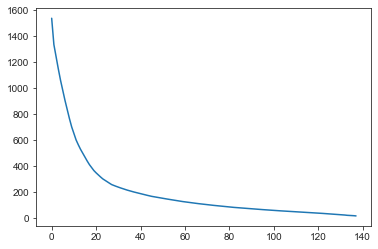

In [43]:
plt.plot(range(138), avg_max_increment_list)

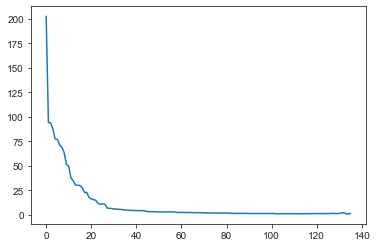

In [44]:
marginal_avg_max_increment_list = []

for i in range(len(avg_max_increment_list) - 1):
    if i != 0:
        marginal_avg_max_increment_list.append(avg_max_increment_list[i - 1] - avg_max_increment_list[i])
        
plt.plot(range(len(marginal_avg_max_increment_list)), marginal_avg_max_increment_list)

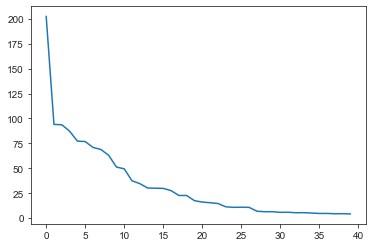

In [48]:
plt.plot(range(len(marginal_avg_max_increment_list[:40])), marginal_avg_max_increment_list[:40])

In [16]:
average_increment_list = []

for key in keys_list2:
    df_i = groups.get_group(key)
    prev_meter_value = 0
    sum_increment = 0
    sum_count = 0
    for i in range(len(df_i.index)):
        curr_meter_value = df_i.iloc[i][1]
        if i != 0:
            if curr_meter_value > prev_meter_value:
                sum_increment += (curr_meter_value - prev_meter_value)
                sum_count += 1
        prev_meter_value = curr_meter_value
    average_increment = round(sum_increment / sum_count, 6)
    average_increment_list.append(average_increment)
    
print(average_increment_list)

[10.42692, 3.94857, 6.987342, 6.316891, 4.386805, 3.005447, 4.651663, 5.735176, 18.584844, 8.742521, 4.071329, 6.862478, 5.094871, 12.15355, 5.505476, 7.390728, 5.681843, 5.994563, 6.793639, 5.756627, 3.738176, 6.925804, 5.786694, 4.887492, 3.587503, 244.101695, 3.969605, 12.521146, 15.581065, 671.0, 7.619704, 8.667235, 4.791174, 113.666667, 20.403064, 8.870763, 4.23814, 14.485459, 3.998305, 36.7875, 21.560821, 3.328149, 6.844444, 8.909443, 17.276923, 12.910288, 140.697674, 13.177066, 17.051656, 9.320015, 24.361656, 8.202899, 30.732759, 5.747209, 12.813866, 11.101031, 1698.0, 12.854962, 19.767045, 4.620885, 6.796938, 65.1875, 31.607397, 12.11974, 4.700599, 3.471452, 69.313496, 5.77156, 92.021622, 6.590345, 24.393204, 6.771372, 7.172503, 13.294375, 13.77413, 9.859155, 34.51634, 54.532934, 13.586796, 329.741935, 10.779982, 81.612903, 8.841008, 6.745544, 6.569719, 10.733582, 13.59612, 17.582222, 8.662338, 7.062817, 113.952381, 4.616251, 35.869416, 218.882353, 143.827586, 11.758442, 15.741

In [17]:
delta_1percent_list = []
delta_5percent_list = []
delta_10percent_list = []
delta_20percent_list = []
delta_50percent_list = []
constant_list = []
decrease_list = []

for key in keys_list2:
    df_i = groups.get_group(key)
    prev_meter_value = 0
    delta_1percent_count = 0
    delta_5percent_count = 0
    delta_10percent_count = 0
    delta_20percent_count = 0
    delta_50percent_count = 0
    constant_count = 0
    decrease_count = 0
    average_increment = average_increment_list[keys_list2.index(key)]
    for i in range(len(df_i.index)):
        curr_meter_value = df_i.iloc[i][1]
        if i != 0:
            if curr_meter_value > prev_meter_value:
                increment = curr_meter_value - prev_meter_value
                delta_percentage = round(abs(increment - average_increment) / average_increment * 100, 3)
                if delta_percentage <= 1:
                    delta_1percent_count += 1
                elif delta_percentage <= 5:
                    delta_5percent_count += 1
                elif delta_percentage <= 10:
                    delta_10percent_count += 1
                elif delta_percentage <= 20:
                    delta_20percent_count += 1
                else:
                    delta_50percent_count += 1
            elif curr_meter_value == prev_meter_value:
                constant_count += 1
            else:
                decrease_count += 1

        prev_meter_value = curr_meter_value
  
    delta_1percent_list.append(delta_1percent_count)
    delta_5percent_list.append(delta_5percent_count)
    delta_10percent_list.append(delta_10percent_count)
    delta_20percent_list.append(delta_20percent_count)
    delta_50percent_list.append(delta_50percent_count)
    constant_list.append(constant_count)
    decrease_list.append(decrease_count)

In [18]:
df_increase_error = pd.DataFrame(keys_list2, columns=['meterid'])
df_increase_error = df_increase_error.assign(averageIncrement=average_increment_list)
df_increase_error = df_increase_error.assign(within1percent=delta_1percent_list)
df_increase_error = df_increase_error.assign(within5percent=delta_5percent_list)
df_increase_error = df_increase_error.assign(within10percent=delta_10percent_list)
df_increase_error = df_increase_error.assign(within20percent=delta_20percent_list)
df_increase_error = df_increase_error.assign(within50percent=delta_50percent_list)
df_increase_error = df_increase_error.assign(constant=constant_list)
df_increase_error = df_increase_error.assign(decrease=decrease_list)
df_increase_error

,meterid,averageIncrement,within1percent,within5percent,within10percent,within20percent,within50percent,constant,decrease
0,1042,10.426920,0,44,0,37,1390,2357,1
1,5810,3.948570,0,881,0,0,3630,37712,10
2,7739,6.987342,0,0,0,276,1383,2772,1
3,2129,6.316891,0,0,691,0,3992,9100,3
4,5193,4.386805,0,0,688,0,3738,15033,4
5,484,3.005447,0,0,0,0,4957,39067,9
6,94,4.651663,0,0,0,1069,4041,31218,6
7,1718,5.735176,0,345,0,0,3129,20991,4
8,9639,18.584844,0,97,64,228,5127,8277,2
9,7794,8.742521,0,0,265,176,3637,4449,1


In [19]:
df_increase_error.sort_values(by=['averageIncrement'], ascending=False)

,meterid,averageIncrement,within1percent,within5percent,within10percent,within20percent,within50percent,constant,decrease
121,4874,6986.000000,1,0,0,0,0,0,0
56,9620,1698.000000,0,0,0,0,20,2,0
29,6101,671.000000,0,0,0,0,2,0,0
79,5545,329.741935,0,2,1,0,28,1,0
25,6685,244.101695,0,0,1,3,55,18,0
93,2814,218.882353,0,0,0,2,32,2,0
111,4671,155.894737,0,0,1,0,18,1,0
94,2645,143.827586,0,0,0,1,57,15,0
46,6863,140.697674,0,1,1,6,207,456,0
90,2946,113.952381,0,1,1,5,35,2,0


In [38]:
increase_list = average_increment_list
increase_list.sort(reverse=True)
print(increase_list)
print(len(increase_list))

[6986.0, 1698.0, 671.0, 329.741935, 244.101695, 218.882353, 155.894737, 143.827586, 140.697674, 113.952381, 113.666667, 92.021622, 81.612903, 69.313496, 65.1875, 54.532934, 36.7875, 36.617414, 35.869416, 34.51634, 34.030418, 32.483636, 31.607397, 30.732759, 28.029205, 26.951111, 24.935393, 24.797784, 24.393204, 24.361656, 22.982659, 22.381955, 21.560821, 21.403189, 20.8879, 20.403064, 20.062992, 19.900344, 19.870085, 19.85124, 19.767045, 18.584844, 17.993769, 17.582222, 17.276923, 17.051656, 16.232798, 15.836066, 15.74145, 15.581065, 15.312916, 14.70216, 14.485459, 14.371047, 13.77413, 13.59612, 13.586796, 13.581808, 13.294375, 13.177066, 12.910288, 12.854962, 12.813866, 12.521146, 12.15355, 12.11974, 11.758442, 11.210637, 11.101031, 10.779982, 10.733582, 10.470128, 10.42692, 10.338756, 10.065766, 9.859155, 9.320015, 8.909443, 8.870763, 8.841008, 8.742521, 8.667235, 8.663411, 8.662338, 8.610949, 8.566618, 8.222958, 8.202899, 7.651042, 7.619704, 7.390728, 7.172503, 7.062817, 6.987342, 6

In [130]:
increase_threshold_list = []

for i in range(138):
    sublist = increase_list[i:]
    increase_threshold_list.append(sum(sublist)/len(sublist))

print(increase_threshold_list)

[91.30506469784176, 41.343507195652215, 29.251124036496336, 24.53238230147057, 22.271570799999985, 20.61612211194028, 19.12539857142856, 18.08926721969696, 17.12943272519084, 16.17890779230769, 15.42097389147287, 14.653429414062506, 14.044231047244098, 13.50797174603175, 13.061527552000001, 12.641156806451615, 12.300573252032521, 12.09986073770492, 11.897236330578515, 11.697468166666669, 11.505712941176473, 11.314825610169494, 11.133895606837608, 10.957399905172416, 10.785440260869567, 10.63417916666667, 10.489781539823008, 10.360802866071428, 10.230739972972973, 10.101990299999999, 9.97116767889908, 9.850690907407406, 9.733576289719622, 9.62199850943396, 9.509796695238093, 9.400391855769229, 9.293569796116502, 9.187987225490195, 9.081924287128711, 8.974042679999997, 8.864171999999996, 8.752918193877548, 8.651558134020616, 8.554243437499997, 8.459212084210526, 8.365406648936169, 8.27200611827957, 8.18547577173913, 8.101403351648353, 8.016513944444446, 7.931518988764047, 7.8476394772727

In [131]:
increase_threshold_df = pd.DataFrame(increase_threshold_list, columns=['average increase'])
increase_threshold_df

,average increase
0,91.305065
1,41.343507
2,29.251124
3,24.532382
4,22.271571
5,20.616122
6,19.125399
7,18.089267
8,17.129433
9,16.178908


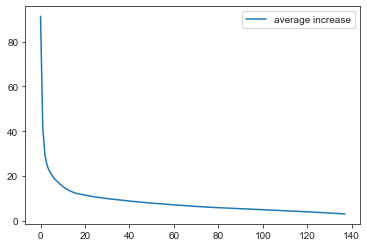

In [51]:
sns.lineplot(data=increase_threshold_df)

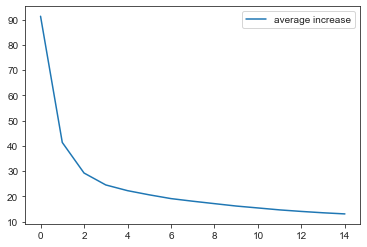

In [54]:
sns.lineplot(data=increase_threshold_df.iloc[:15])

In [132]:
increase_marginal_change_list = []

for i in range(len(increase_threshold_list)):
    if i != 0:
        increase_marginal_change_list.append(increase_threshold_list[i-1] - increase_threshold_list[i])
        
print(increase_marginal_change_list)

[49.96155750218954, 12.09238315915588, 4.718741735025766, 2.2608115014705845, 1.6554486880597032, 1.4907235405117234, 1.0361313517315978, 0.9598344945061221, 0.9505249328831482, 0.7579339008348196, 0.7675444774103646, 0.6091983668184078, 0.5362593012123487, 0.4464441940317485, 0.4203707455483858, 0.34058355441909427, 0.2007125143276003, 0.20262440712640561, 0.19976816391184649, 0.19175522549019597, 0.1908873310069783, 0.1809300033318859, 0.17649570166519268, 0.1719596443028486, 0.1512610942028978, 0.1443976268436611, 0.12897867375158079, 0.13006289309845442, 0.12874967297297424, 0.13082262110091847, 0.12047677149167413, 0.11711461768778442, 0.11157778028566234, 0.11220181419586694, 0.10940483946886381, 0.10682205965272651, 0.10558257062630716, 0.10606293836148417, 0.10788160712871431, 0.10987068000000022, 0.1112538061224484, 0.10136005985693153, 0.09731469652061975, 0.0950313532894711, 0.0938054352743567, 0.09340053065659859, 0.08653034654044056, 0.0840724200907772, 0.08488940720390659

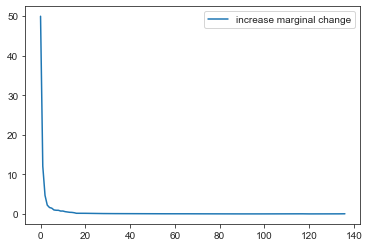

In [134]:
increase_marginal_change_df = pd.DataFrame(increase_marginal_change_list, columns=['increase marginal change'])
sns.lineplot(data=increase_marginal_change_df)

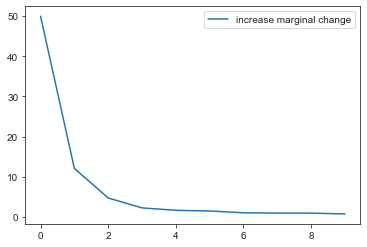

In [135]:
sns.lineplot(data=increase_marginal_change_df.iloc[:10])

In [136]:
malfunction_sharp_increase = [4874, 9620, 6101, 5545]
malfunction_sharp_increase.sort()
print(malfunction_sharp_increase)

[4874, 5545, 6101, 9620]


### Checking Sampling Period

<b>Getting a list containing the average sampling period of every meter</b>

In [128]:
samp_period_list = []

for key in keys_list:
    df_i = groups.get_group(key)
    start = df_i.head(1).index.item()
    end = df_i.tail(1).index.item()
    period = end - start
    period_seconds = period.total_seconds()
    sample_count = len(df_i.index)
    samp_period_list.append(round(period_seconds / sample_count, 3))

print(samp_period_list)
print(len(samp_period_list))

[1331.54, 7987.478, 1479.464, 435.013, 6075.927, 15156.239, 5788.803, 942.5, 4340.262, 572.213, 359.067, 4362.608, 503.056, 2608.427, 450.83, 4064.046, 526.513, 14797.415, 856.522, 1292.74, 7512.779, 14883.727, 484.959, 4283.89, 599.964, 4644.924, 3370.888, 480.089, 646.099, 1184.34, 1429.335, 9431.604, 2827.491, 994.738, 2153.605, 208.063, 1169.153, 912.988, 1146.018, 6911.861, 1773.099, 5533.95, 2900.413, 1234.015, 9514.713, 7595.324, 2758.475, 169030.934, 22635.927, 96812.003, 18158.627, 1370.849, 33554.24, 3101.576, 4899.285, 4598.992, 2911.828, 3933.222, 1329.611, 1309.967, 1456.039, 7116.733, 4302.707, 1721.202, 1702.338, 1158.766, 10086.732, 588.913, 2142.872, 1526.569, 1261.067, 15374.998, 19324.431, 13435.344, 4729.024, 8192.441, 8183.171, 4807.326, 1716.916, 828.746, 560990.309, 2975.533, 2083.478, 1409490.602, 1131.373, 3524.266, 1041.042, 712.031, 6906.726, 1488.945, 9814.518, 618.566, 2320.96, 7687.156, 191075.704, 4061.906, 19205.386, 1306.137, 374.369, 372.614, 1117.539,

<b>Mapping the average sampling period with the meter id<b>

In [138]:
samp_period_df = pd.DataFrame(samp_period_list, columns=['avg samp period'])
samp_period_df = samp_period_df.assign(meterid=keys_list)
samp_period_df = samp_period_df.sort_values(by=['avg samp period'], ascending=False)
samp_period_df

,avg samp period,meterid
83,1409490.602,4874
80,560990.309,4671
149,507018.210,9620
102,221959.299,6101
94,191075.704,5545
47,169030.934,2645
107,153330.603,6685
49,96812.003,2814
137,56590.606,8703
119,45618.318,7566


<b>Getting a list containing the average sampling period across all meters as meters with the highest individual average sampling period is removed</b>

In [139]:
samp_period_threshold_list = []

for i in range(156):
    sublist = samp_period_list[i:]
    samp_period_threshold_list.append(sum(sublist) / len(sublist))

In [140]:
samp_period_threshold_list.sort(reverse=True)
print(samp_period_threshold_list)
print(len(samp_period_threshold_list))

[68077.23650000001, 61027.95022222222, 55377.820700000004, 50397.64118181819, 46412.106750000006, 45049.96253246752, 44483.02385897435, 44477.330076923085, 43941.68072151898, 43452.501287499996, 43017.07745679012, 42592.38676829267, 42136.201674698794, 41794.524797619044, 41530.17075294117, 41380.65350000001, 41226.0408372093, 40766.67332183907, 40320.76304545454, 39891.797977528084, 39455.09925555555, 39226.99722972972, 39132.36994505494, 38855.466, 38731.75030666666, 38719.61338043478, 38321.578161290316, 38261.27376315788, 37932.212457446796, 37578.21766315789, 37260.910531249996, 36891.78814432989, 36572.9853125, 36528.708336734686, 36173.16189898989, 35850.76249999999, 35837.73191818181, 35539.72059459459, 35524.63443564355, 35290.21705357142, 35221.44186274509, 35062.1152477876, 34927.05199029126, 34765.37752631578, 34726.70046296295, 34621.03779807691, 34615.775935779806, 34610.87781904761, 34540.78676470588, 34488.29087826086, 34297.292641509426, 34238.684491379296, 34146.46399

In [141]:
samp_period_threshold_df = pd.DataFrame(samp_period_threshold_list, columns=['average sample rate'])
samp_period_threshold_df

,average sample rate
0,68077.236500
1,61027.950222
2,55377.820700
3,50397.641182
4,46412.106750
5,45049.962532
6,44483.023859
7,44477.330077
8,43941.680722
9,43452.501287


<b>Plots of the average sampling period across all meters against number of meters (ranked based on individual average sampling period) removed</b>

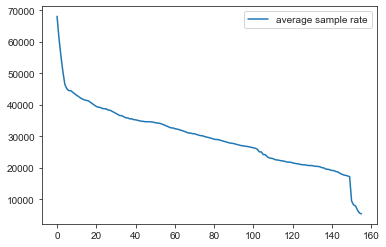

In [142]:
sns.lineplot(data=samp_period_threshold_df)

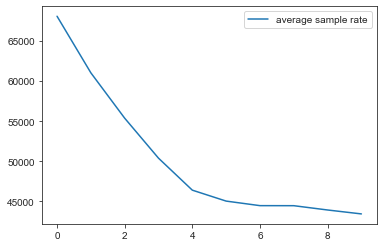

In [143]:
sns.lineplot(data=samp_period_threshold_df.iloc[:10])

<b>Getting a list containing the marginal decrease in average sampling period across all meters as meters with the highest individual average sampling period is removed</b>

In [144]:
samp_marginal_change_list = []

print(samp_period_threshold_list)

for i in range(len(samp_period_threshold_list)):
    if i != 0:
        samp_marginal_change_list.append(samp_period_threshold_list[i - 1] - samp_period_threshold_list[i])

# print(samp_marginal_change_list)

[68077.23650000001, 61027.95022222222, 55377.820700000004, 50397.64118181819, 46412.106750000006, 45049.96253246752, 44483.02385897435, 44477.330076923085, 43941.68072151898, 43452.501287499996, 43017.07745679012, 42592.38676829267, 42136.201674698794, 41794.524797619044, 41530.17075294117, 41380.65350000001, 41226.0408372093, 40766.67332183907, 40320.76304545454, 39891.797977528084, 39455.09925555555, 39226.99722972972, 39132.36994505494, 38855.466, 38731.75030666666, 38719.61338043478, 38321.578161290316, 38261.27376315788, 37932.212457446796, 37578.21766315789, 37260.910531249996, 36891.78814432989, 36572.9853125, 36528.708336734686, 36173.16189898989, 35850.76249999999, 35837.73191818181, 35539.72059459459, 35524.63443564355, 35290.21705357142, 35221.44186274509, 35062.1152477876, 34927.05199029126, 34765.37752631578, 34726.70046296295, 34621.03779807691, 34615.775935779806, 34610.87781904761, 34540.78676470588, 34488.29087826086, 34297.292641509426, 34238.684491379296, 34146.46399

<b>Plots of the marginal decrease in average sampling period across all meters against number of meters (ranked based on individual average sampling period) removed</b>

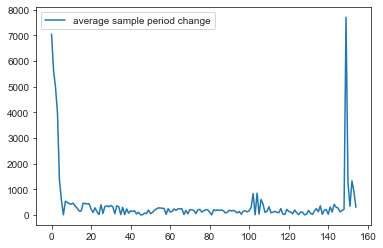

In [145]:
samp_period_change_df = pd.DataFrame(samp_marginal_change_list, columns=['average sample period change'])
sns.lineplot(data=samp_period_change_df)

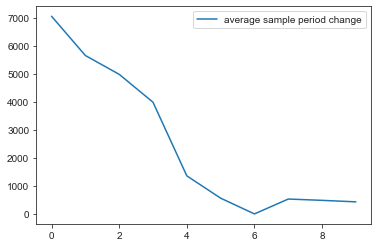

In [146]:
sns.lineplot(data=samp_period_change_df.iloc[:10])

In [147]:
malfunction_samp_period = [1874, 4671, 9620, 6101, 5545, 2645]
malfunction_samp_period.sort()
print(malfunction_samp_period)

[1874, 2645, 4671, 5545, 6101, 9620]


### Checking sampling of constant readings

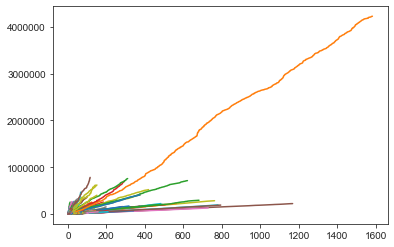

In [208]:
import matplotlib.pyplot as plt

# df_i = groups.get_group(35)
# prev_val = 0
# prev_time = df_i.index[0]
# tmp_x = []
# tmp_y = []
# constant_flag = False
# constant_count = -1

# for i in range(len(df_i.index)):
#     curr_val = df_i.iloc[i][1]
#     curr_time = df_i.index[i]
#     if i != 0:
#         if curr_val == prev_val:
#             if not constant_flag:
#                 prev_time = curr_time
#             time = curr_time - prev_time
#             time_seconds = time.total_seconds()
#             constant_count += 1
#             tmp_x.append(constant_count)
#             tmp_y.append(time_seconds)
#             constant_flag = True
#         else:
#             if len(tmp_x) > 10:
#                 plt.plot(tmp_x, tmp_y)
#             tmp_x.clear()
#             tmp_y.clear()
#             constant_flag = False
#             constant_count = -1
#     prev_val = curr_val


for key in keys_list:
    df_i = groups.get_group(key)
    prev_val = 0
    prev_time = df_i.index[0]
    tmp_x = []
    tmp_y = []
    constant_flag = False
    constant_count = -1

    for i in range(len(df_i.index)):
        curr_val = df_i.iloc[i][1]
        curr_time = df_i.index[i]
        if i != 0:
            if curr_val == prev_val:
                if not constant_flag:
                    prev_time = curr_time
                time = curr_time - prev_time
                time_seconds = time.total_seconds()
                constant_count += 1
                tmp_x.append(constant_count)
                tmp_y.append(time_seconds)
                constant_flag = True
            else:
                if len(tmp_x) > 10:
                    plt.plot(tmp_x, tmp_y)
                tmp_x.clear()
                tmp_y.clear()
                constant_flag = False
                constant_count = -1
        prev_val = curr_val    

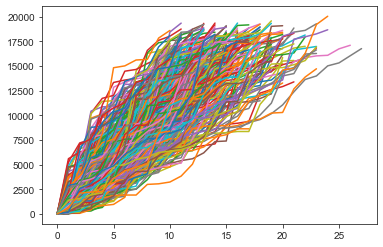

In [209]:
df_i = groups.get_group(35)
prev_val = 0
prev_time = df_i.index[0]
tmp_x = []
tmp_y = []
constant_flag = False
constant_count = -1

for i in range(len(df_i.index)):
    curr_val = df_i.iloc[i][1]
    curr_time = df_i.index[i]
    if i != 0:
        if curr_val == prev_val:
            if not constant_flag:
                prev_time = curr_time
            time = curr_time - prev_time
            time_seconds = time.total_seconds()
            constant_count += 1
            tmp_x.append(constant_count)
            tmp_y.append(time_seconds)
            constant_flag = True
        else:
            if len(tmp_x) > 10:
                plt.plot(tmp_x, tmp_y)
            tmp_x.clear()
            tmp_y.clear()
            constant_flag = False
            constant_count = -1
    prev_val = curr_val
